## Animation

**Список литературы**:

*1)    Milovanovic, Foures, Vettigli — Python Data Visualization Cookbook, 2nd Edition*

Этот Jupyter Notebook посвящен созданию анимаций. Эта тема простая, и я решил ограничиться двумя минимальными примерами с пояснениями, в которые спокойно обычно можно уложиться на практике.

### ArtistAnimation

<IPython.core.display.Javascript object>


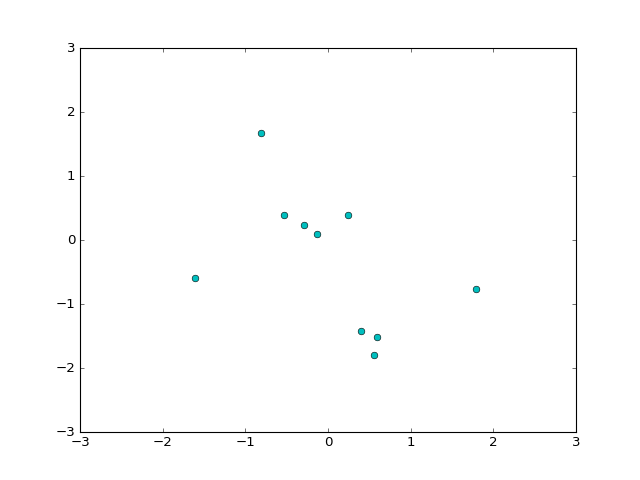

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.animation as animation

fig = plt.figure()

# see note 4.1
ims = []
for add in np.arange(15):
    ims.append((plt.plot(np.random.normal(0, 1, 10), np.random.normal(0, 1, 10), 'o')))

im_ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=100,
    blit=True)
#set blit to False if you're under OS X!


plt.show()

*На графике изображеная последовательность реализаций случайных величин X, Y - стандартные нормальные величины*

**Note 1.1**

Если вам кажется, что анимация в matplotlib должна быть сложной в реализации, то это отнюдь не так. В matplotlib есть два основных класса для создания аницмаций - animation.ArtistAnimation и animation.FuncAnimation . В качестве первого примера я взял ArtistAnimation - все что требуется от пользователя это предподсчитать массив картинок, которые будут отображаться с таким-то интервалом (параметр ArtistAnimation interval). Вся анимация будет повторяться с такой-то задержкой (параметр ArtistAnimation repeat_delay).

### FuncAnimation

<IPython.core.display.Javascript object>


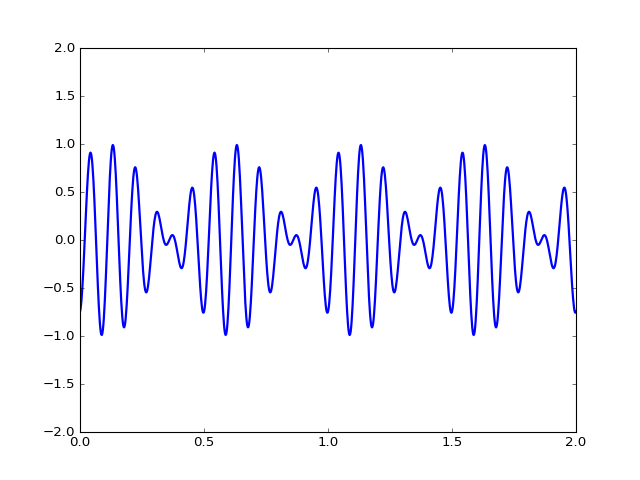

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def init():
    """Clears current frame."""
    line.set_data([], [])
    return line,

def animate(i):
    """Draw figure.
    @param i: Frame counter
    @type i: int
    """
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i)) * np.cos(22 * np.pi * (x -0.01*i))
    line.set_data(x, y)
    return line,

# see note 5.1
animator = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=200, interval=20, blit=False)

#set blit to False if you're under OS X!
plt.show()

*На графике изображена <<ползущий>> косинус сменной амплитуды*

**Note 2.1**

В этом примере мы воспользовались FuncAnimation. Структура кода для реализации анимации с помощью этого класса несколько отличается от ArtistAnimation. Если в предыдущем примере нужно было прописать массив картинок, то здесь - нужно реализовать функцию, которая возвращает картинку на каждом шаге анимации.